1. Why loss is better than gradient-norm?
Though gradient-norm and loss value will all decrease as the training goes, gradient-norm is easier to oscillate than loss value, since it is not our direct objective. That will cause the probability distribution more "unbalanced".

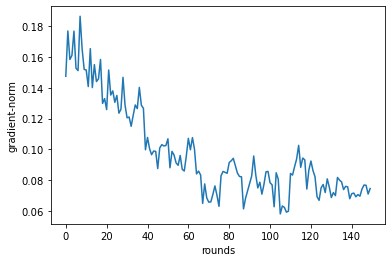

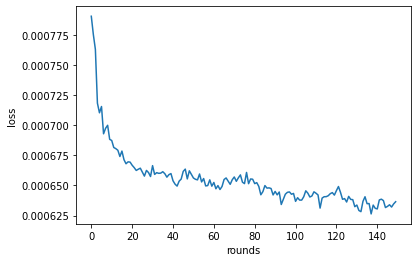

In [74]:
import numpy as np
folder_name = "./result/5task_nnnnn_distribution_lessVenn_OS_a1_14"
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_OS.pkl", "rb") as f:
    gradient_OS = pickle.load(f)
# last round
gradient_OS = np.array(gradient_OS)[:, 2]
import matplotlib.pyplot as plt
length = range(len(gradient_OS))
plt.plot(length, gradient_OS)
# x-axis: rounds, y: gradient-norm
plt.xlabel("rounds")
plt.ylabel("gradient-norm")
plt.show()

folder_name = "./result/5task_nnnnn_distribution_lessVenn_AS_a1_14"
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_AS.pkl", "rb") as f:
    gradient_AS = pickle.load(f)
# last round
loss_AS = np.array(gradient_AS)[:, 2]
import matplotlib.pyplot as plt
length = range(len(loss_AS))
plt.plot(length, loss_AS)
plt.xlabel("rounds")
plt.ylabel("loss")
plt.show()

5 task, each task, loss distribution in a specific round


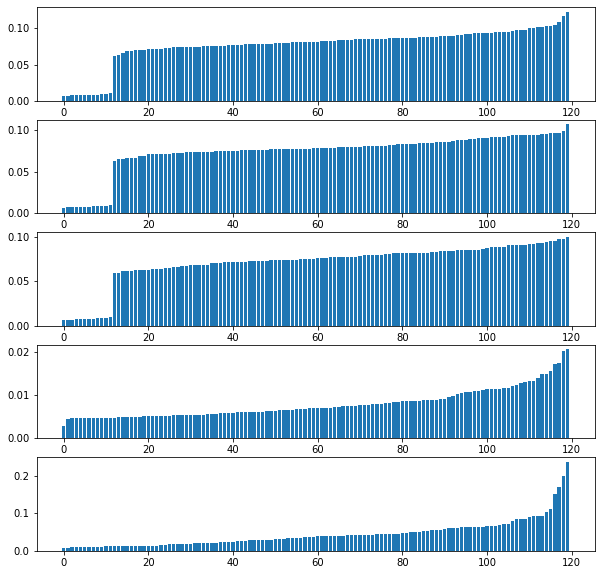

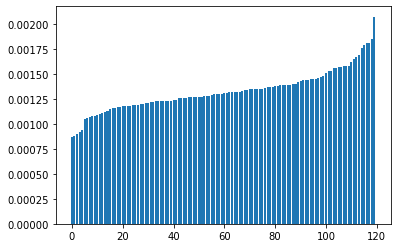

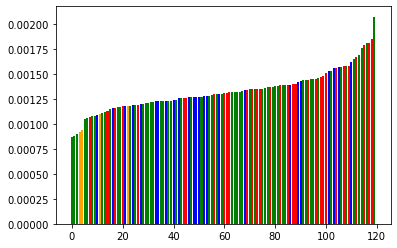

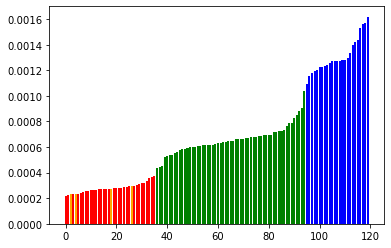

In [1]:
folder_name = "./result/5task_nnnnn_fffse_lessVenn_AS_a1_18"
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0 = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print('5 task, each task, loss distribution in a specific round')
one_client_task_loss = localLoss_exp0_algo0[1, :, 109]
# plot one client task loss
import matplotlib.pyplot as plt
# sort and plot
# plot 5 plots, using subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i in range(5):
    one_client_task_loss = localLoss_exp0_algo0[i, :, -1]
    sorted_index = np.argsort(one_client_task_loss)
    axs[i].bar(np.arange(120), one_client_task_loss[sorted_index])
plt.show()

import pickle
# read folder_name+dis.pkl
with open(folder_name+"/dis.pkl", "rb") as f:
    dis = pickle.load(f)

Mi1 =localLoss_exp0_algo0[0,:,-1]*dis[0]+\
    localLoss_exp0_algo0[1,:,-1]*dis[1]+\
    localLoss_exp0_algo0[2,:,-1]*dis[2]+\
    localLoss_exp0_algo0[4,:,-1]*dis[4]+\
    localLoss_exp0_algo0[3,:,-1]*dis[3]
sorted_index1 = np.argsort(Mi1)
plt.bar(np.arange(120), Mi1[sorted_index1])
plt.show()

with open(folder_name+"/client_task_ability.pkl", "rb") as f:
    client_task_ability = pickle.load(f)
client_task_ability = np.array(client_task_ability)

# if without shakespear (task index=3)
Mi2 =localLoss_exp0_algo0[0,:,-1]*dis[0]/client_task_ability+\
    localLoss_exp0_algo0[1,:,-1]*dis[1]/client_task_ability+\
    localLoss_exp0_algo0[2,:,-1]*dis[2]/client_task_ability+\
    localLoss_exp0_algo0[4,:,-1]*dis[4]/client_task_ability+\
    localLoss_exp0_algo0[3,:,-1]*dis[3]/client_task_ability
sorted_index2 = np.argsort(Mi2)


color_list_processor1 = []
for index in sorted_index1:
    if client_task_ability[index] == 1:
        color_list_processor1.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor1.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor1.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor1.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor1.append('red')



color_list_processor2 = []
for index in sorted_index2:
    if client_task_ability[index] == 1:
        color_list_processor2.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor2.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor2.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor2.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor2.append('red')


plt.bar(np.arange(120), Mi1[sorted_index1], color=color_list_processor1)
plt.show()
plt.bar(np.arange(120), Mi2[sorted_index2], color=color_list_processor2)
plt.show()


In [7]:
# connect processor index and client index
processor2client = {}
processor_num = sum(client_task_ability)
p_index = 0
for c_index in range(120):
    for _ in range(client_task_ability[c_index]):
        processor2client[p_index] = c_index
        p_index += 1

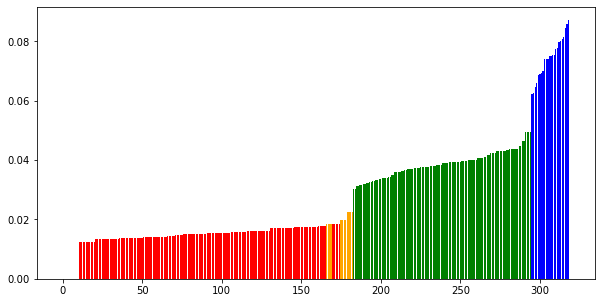

In [14]:
# plot psi distribution
with open(folder_name+"/psi_AS.pkl", "rb") as f:
    psi = pickle.load(f)
psi = np.array(psi[-1])
# psi = psi.reshape(-1)
psi_sum = psi[0,:]
# sort and plot bar
sorted_index = np.argsort(psi_sum)
# plot
# color
color_list_processor = []
for p_index in sorted_index:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor.append('red')
import matplotlib.pyplot as plt
length = range(len(psi_sum))

plt.figure(figsize=(10, 5))
plt.bar(length, psi_sum[sorted_index], color=color_list_processor)
plt.show()

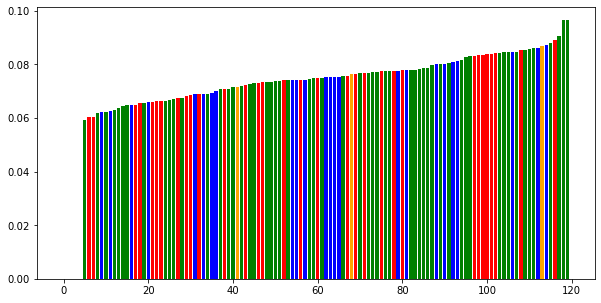

In [15]:
p_client = np.zeros(120)
p_N = psi_sum.shape[0]
for processor_index in range(p_N):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-psi_sum[processor_index])**process_num
# sort and plot bar
sorted_index = np.argsort(p_client)
# color
color_list_processor = []
for c_index in sorted_index:
    index = c_index
    if client_task_ability[index] == 1:
        color_list_processor.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor.append('red')
# plot
import matplotlib.pyplot as plt
length = range(len(p_client))
plt.figure(figsize=(10, 5))
plt.bar(length, p_client[sorted_index], color=color_list_processor)
plt.show()

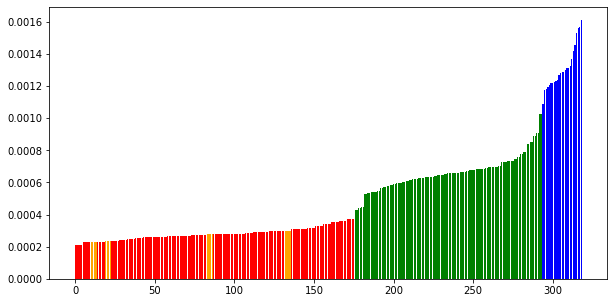

In [10]:
import numpy as np
# read gradient_AS.pkl
import pickle
with open(folder_name+"/gradient_AS.pkl", "rb") as f:
    gradient_AS = pickle.load(f)
# last round
gradient_AS = gradient_AS[-1]
# sort and plot bar
sorted_index3 = np.argsort(gradient_AS)


color_list_processor3 = []
for p_index in sorted_index3:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor3.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor3.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor3.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor3.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor3.append('red')

import matplotlib.pyplot as plt
length = range(len(gradient_AS))
# make plot wider
plt.figure(figsize=(10, 5))
plt.bar(length, gradient_AS[sorted_index3], color=color_list_processor3)
plt.show()

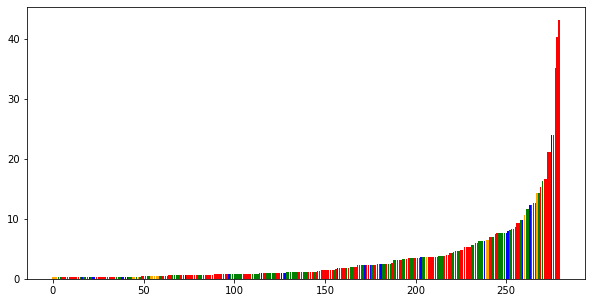

In [59]:
import numpy as np
# read gradient_AS.pkl
import pickle
folder_name_OS = "./result/5task_nnnnn_fffse_lessVenn_OS_a1_19"
with open(folder_name_OS+"/gradient_OS.pkl", "rb") as f:
    gradient_OS = pickle.load(f)
# last round
gradient_OS = gradient_OS[-1]
# sort and plot bar
sorted_index4 = np.argsort(gradient_OS)

color_list_processor4 = []
for p_index in sorted_index4:
    index = processor2client[p_index]
    if client_task_ability[index] == 1:
        color_list_processor4.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor4.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor4.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor4.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor4.append('red')

import matplotlib.pyplot as plt
length = range(len(gradient_OS))
# make plot wider
plt.figure(figsize=(10, 5))
plt.bar(length, gradient_OS[sorted_index4], color=color_list_processor4)
plt.show()

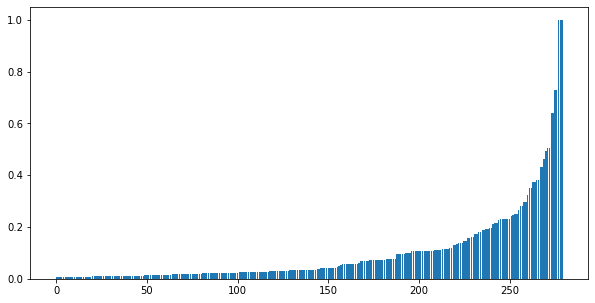

In [105]:
# plot psi distribution
with open(folder_name_OS+"/psi_OS.pkl", "rb") as f:
    psi = pickle.load(f)
psi = np.array(psi[-1])
# psi = psi.reshape(-1)
psi_sum = np.sum(psi, axis=0)
# sort and plot bar
sorted_index = np.argsort(psi_sum)
# plot
import matplotlib.pyplot as plt
length = range(len(psi_sum))

plt.figure(figsize=(10, 5))
plt.bar(length, psi_sum[sorted_index])
plt.show()

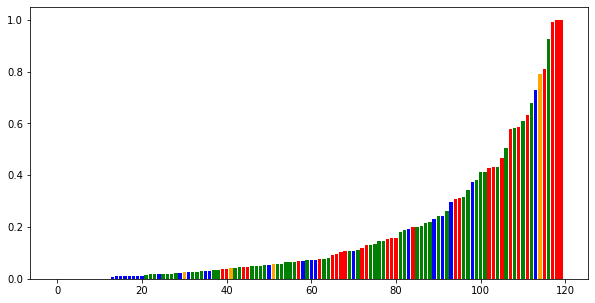

In [106]:
p_client = np.zeros(120)
p_N = psi_sum.shape[0]
for processor_index in range(p_N):
    client_index = processor2client[processor_index]
    process_num = client_task_ability[client_index]
    p_client[client_index] = 1 - (1-psi_sum[processor_index])**process_num
# sort and plot bar
sorted_index = np.argsort(p_client)
# color
color_list_processor = []
for c_index in sorted_index:
    index = c_index
    if client_task_ability[index] == 1:
        color_list_processor.append('blue')
    elif client_task_ability[index] == 2:
        color_list_processor.append('green')
    elif client_task_ability[index] == 3:
        color_list_processor.append('yellow')
    elif client_task_ability[index] == 4:
        color_list_processor.append('orange')
    elif client_task_ability[index] == 5:
        color_list_processor.append('red')
# plot
import matplotlib.pyplot as plt
length = range(len(p_client))
plt.figure(figsize=(10, 5))
plt.bar(length, p_client[sorted_index], color=color_list_processor)
plt.show()

Using gradient-norm results in a more peaked distribution.
For each task, the punishment term:
$\left( \sum_{i \in \mathcal{A}_{\tau,s}} \frac{d_{i,s}}{v_i p_{s|i}^\tau} \right)^2$

In [66]:
# compue variance
def sampling_variance(psi):
    processes_num = psi.shape[1]
    p_s_i = psi
    tasks_num = p_s_i.shape[0]
    exp=100
    punishment_exp = []

    for _ in range(exp):
        allocation_result = np.zeros(processes_num, dtype=int)
        for process_idx in range(processes_num):
            if abs(1-np.sum(p_s_i[:, process_idx])) < 1e-6:
                p_not_choose = 0
            else:
                p_not_choose = 1 - np.sum(p_s_i[:, process_idx])
            # append p_not_choose to the head of p_s_i
            p_client = np.zeros(tasks_num+1)
            p_client[0] = p_not_choose
            p_client[1:] = p_s_i[:, process_idx]
            allocation_result[process_idx] = np.random.choice(np.arange(-1, tasks_num), p=p_client)
        allocation_result = allocation_result.tolist()
        clients_task = [s for s in allocation_result if s != -1]
        chosen_process_order = [i for i in range(len(allocation_result)) if allocation_result[i] != -1]
        chosen_clients = [processor2client[i] for i in chosen_process_order]

        punishment_avg = 0
        for task_index in range(tasks_num):
            punishment_each_task = 0
            for process_index in range(processes_num):
                client_index = processor2client[process_index]
                if p_s_i[task_index][process_index] == 0:
                    continue
                else:
                    # if client_idx is active, then add it
                    if client_index in chosen_clients:
                        punishment_each_task += dis[task_index][client_index] / client_task_ability[client_index] / p_s_i[task_index][process_index]
            punishment_each_task = (punishment_each_task - 1)**2
            punishment_avg += punishment_each_task
        punishment_avg /= tasks_num
        punishment_exp.append(punishment_avg)
    return np.var(punishment_exp)


In [67]:
# compute variance, AS
from tqdm import tqdm
folder_variance_AS = "./result/5task_nnnnn_distribution_lessVenn_AS_a1_16"
with open(folder_variance_AS+"/psi_AS.pkl", "rb") as f:
    psi_AS = pickle.load(f)
variance_AS = []
for p_distribution in tqdm(psi_AS):
    variance_AS.append(sampling_variance(p_distribution))


100%|██████████| 150/150 [03:12<00:00,  1.28s/it]


In [68]:
# compute variance, OS
folder_variance_OS = "./result/5task_nnnnn_distribution_lessVenn_OS_a1_16"
with open(folder_variance_OS+"/psi_OS.pkl", "rb") as f:
    psi_OS = pickle.load(f)
variance_OS = []
for p_distribution in tqdm(psi_OS):
    variance_OS.append(sampling_variance(p_distribution))


100%|██████████| 150/150 [03:05<00:00,  1.24s/it]


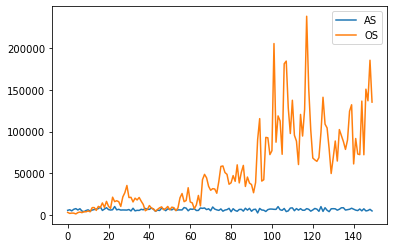

In [70]:
# plot variance
import matplotlib.pyplot as plt
plt.plot(variance_AS, label="AS")
plt.plot(variance_OS, label="OS")
plt.legend()
plt.show()

2. Each round, only select a subset of clients to update the loss.

In [17]:
# show an example of full sampling and downsampling.
folder_name_full = "./result/5task_iiiii_fffse_lessVenn_AS_a1_14"
folder_name_down = "./result/5task_nnnnn_distribution_f1lessVenn_ASF0.1_a1_14"
import numpy as np
localLoss_full = np.load(folder_name_full+"/localLoss_exp0_algo0.npy")
localLoss_down = np.load(folder_name_down+"/localLoss_exp0_algo0.npy")
# localLoss shape: 5(taskNum), 120(clientNum), 150(roundNum)
np.set_printoptions(precision=3, suppress=True)

In [18]:
round_full = 0
import time
from IPython.display import clear_output
for r in range(150):
    print("full sampling")
    print(localLoss_full[:, :10, round_full])
    round_full += 1
    # remove the current output
    clear_output(wait=True)
    # sleep for 0.5 sec
    time.sleep(0.2)

full sampling
[[0.077 0.074 0.092 0.082 0.073 0.071 0.079 0.078 0.078 0.071]
 [0.091 0.078 0.082 0.085 0.082 0.084 0.096 0.096 0.091 0.09 ]
 [0.091 0.08  0.093 0.085 0.084 0.086 0.093 0.083 0.095 0.092]
 [0.006 0.007 0.013 0.004 0.005 0.007 0.005 0.006 0.006 0.006]
 [0.016 0.034 0.009 0.023 0.053 0.008 0.303 0.015 0.057 0.043]]


In [19]:
round_down = 0
import time
from IPython.display import clear_output
for r in range(150):
    print("down sampling")
    print(localLoss_down[:, :10, round_down])
    round_down += 1
    # remove the current output
    clear_output(wait=True)
    # sleep for 0.5 sec
    time.sleep(0.2)

down sampling
[[0.072 0.087 0.105 0.083 0.073 0.081 0.063 0.073 0.107 0.079]
 [0.102 0.066 0.079 0.079 0.077 0.09  0.09  0.081 0.082 0.086]
 [0.072 0.079 0.095 0.107 0.074 0.089 0.075 0.103 0.077 0.079]
 [0.087 0.106 0.087 0.098 0.098 0.085 0.082 0.092 0.103 0.086]
 [0.123 0.071 0.099 0.08  0.112 0.084 0.08  0.092 0.084 0.1  ]]


(5, 120, 150)


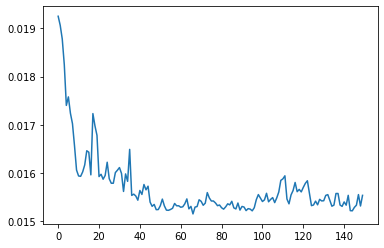

(5, 120, 150)


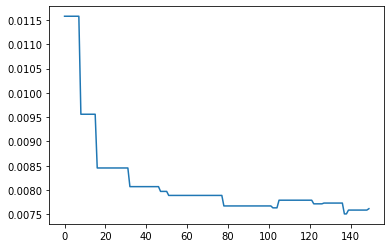

In [2]:
# fine-grained sampling.
folder_name = "./result/5task_nnnnn_distribution_lessVenn_AS_a1_14"
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0 = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print(localLoss_exp0_algo0.shape)
one_client_task_loss = localLoss_exp0_algo0[2, 109, :]
# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(one_client_task_loss)
plt.show()

# low sampling rate.
folder_name = "./result/5task_nnnnn_distribution_f1lessVenn_ASF0.1_a1_14"
# read localLoss_exp0_algo0.npy
import numpy as np
localLoss_exp0_algo0 = np.load(folder_name+"/localLoss_exp0_algo0.npy")
print(localLoss_exp0_algo0.shape)
one_client_task_loss = localLoss_exp0_algo0[2, 109, :]
# plot one client task loss
import matplotlib.pyplot as plt
plt.plot(one_client_task_loss)
plt.show()

3. Number of parameters of each model

In [22]:
# Fashion-MNIST
import torch
from utility import model_list
num_classes = 10
cifar10_model = model_list.resnet(num_classes=num_classes)
fmnist_model = model_list.mnistCNN(num_classes=num_classes)
emnist_model = model_list.EMnistCNN()
sp_model = model_list.CharLSTM()

In [38]:
# print out the number of parameters for each model using torchsummary
from torchsummary import summary
summary(cifar10_model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            1,728
├─Sequential: 1-2                        --
|    └─PreActBlock: 2-1                  --
|    |    └─BatchNorm2d: 3-1             128
|    |    └─Conv2d: 3-2                  36,864
|    |    └─BatchNorm2d: 3-3             128
|    |    └─Conv2d: 3-4                  36,864
|    └─PreActBlock: 2-2                  --
|    |    └─BatchNorm2d: 3-5             128
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─Conv2d: 3-8                  36,864
├─Sequential: 1-3                        --
|    └─PreActBlock: 2-3                  --
|    |    └─BatchNorm2d: 3-9             128
|    |    └─Conv2d: 3-10                 73,728
|    |    └─BatchNorm2d: 3-11            256
|    |    └─Conv2d: 3-12                 147,456
|    |    └─Sequential: 3-13             8,192
|    └─PreActBlock: 2-4                  --
|    |    └─BatchNorm2d: 3-14     

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            1,728
├─Sequential: 1-2                        --
|    └─PreActBlock: 2-1                  --
|    |    └─BatchNorm2d: 3-1             128
|    |    └─Conv2d: 3-2                  36,864
|    |    └─BatchNorm2d: 3-3             128
|    |    └─Conv2d: 3-4                  36,864
|    └─PreActBlock: 2-2                  --
|    |    └─BatchNorm2d: 3-5             128
|    |    └─Conv2d: 3-6                  36,864
|    |    └─BatchNorm2d: 3-7             128
|    |    └─Conv2d: 3-8                  36,864
├─Sequential: 1-3                        --
|    └─PreActBlock: 2-3                  --
|    |    └─BatchNorm2d: 3-9             128
|    |    └─Conv2d: 3-10                 73,728
|    |    └─BatchNorm2d: 3-11            256
|    |    └─Conv2d: 3-12                 147,456
|    |    └─Sequential: 3-13             8,192
|    └─PreActBlock: 2-4                  --
|    |    └─BatchNorm2d: 3-14     

In [37]:
summary(fmnist_model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       320
|    └─MaxPool2d: 2-2                    --
|    └─Conv2d: 2-3                       18,496
|    └─MaxPool2d: 2-4                    --
├─Sequential: 1-2                        --
|    └─Linear: 2-5                       1,606,144
|    └─Linear: 2-6                       5,130
|    └─ReLU: 2-7                         --
|    └─Softmax: 2-8                      --
Total params: 1,630,090
Trainable params: 1,630,090
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       320
|    └─MaxPool2d: 2-2                    --
|    └─Conv2d: 2-3                       18,496
|    └─MaxPool2d: 2-4                    --
├─Sequential: 1-2                        --
|    └─Linear: 2-5                       1,606,144
|    └─Linear: 2-6                       5,130
|    └─ReLU: 2-7                         --
|    └─Softmax: 2-8                      --
Total params: 1,630,090
Trainable params: 1,630,090
Non-trainable params: 0

In [36]:
summary(emnist_model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            832
├─Conv2d: 1-2                            38,448
├─Conv2d: 1-3                            76,864
├─Linear: 1-4                            1,606,144
├─Linear: 1-5                            43,092
├─Linear: 1-6                            3,995
Total params: 1,769,375
Trainable params: 1,769,375
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            832
├─Conv2d: 1-2                            38,448
├─Conv2d: 1-3                            76,864
├─Linear: 1-4                            1,606,144
├─Linear: 1-5                            43,092
├─Linear: 1-6                            3,995
Total params: 1,769,375
Trainable params: 1,769,375
Non-trainable params: 0

In [35]:
summary(sp_model)

Layer (type:depth-idx)                   Param #
├─Embedding: 1-1                         10,240
├─LSTM: 1-2                              921,600
├─Dropout: 1-3                           --
├─Linear: 1-4                            20,560
Total params: 952,400
Trainable params: 952,400
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Embedding: 1-1                         10,240
├─LSTM: 1-2                              921,600
├─Dropout: 1-3                           --
├─Linear: 1-4                            20,560
Total params: 952,400
Trainable params: 952,400
Non-trainable params: 0

Number of parameters---
Fashion MNIST Model: 1,630,090
EMNIST Model: 1,769,375
Shakespeare Model: 952,400

In [27]:
# compare loss of different models
folder_fffse = "./result/5task_nnnnn_fffse_lessVenn_AS_a1_14"
# read mcf_i_globalLoss_exp0_algo0.npy
import numpy as np
globalLoss = np.load(folder_fffse+"/mcf_i_globalLoss_exp0_algo0.npy")
for i in range(5):
    print(np.mean(globalLoss[i, :]))


0.0037050707412901373
0.003962971024059113
0.004063743373325893
0.0063140095229546715
0.003341919360370984


In [40]:
# compare gradient level
folder_fffse = "./result/5task_nnnnn_fffse_lessVenn_OS_a1_18"
# read gradient_record_OS.pkl
import pickle
with open(folder_fffse+"/gradient_record_OS.pkl", "rb") as f:
    gradient_record_OS = pickle.load(f)
gradient_record = gradient_record_OS[-1]
for i in range(5):
    print(np.mean(gradient_record[i, :]))

5.589560824384292
11.120164076487223
10.9802494764328
414.33226674397787
209.28848520914713


In [ ]:
# try ASF for gradient

# only accept different models for each client-processor, unbiased